In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Датасет Census  
https://archive.ics.uci.edu/ml/datasets/Census+Income  
Датасет был составлен Барри Беккером из базы данных о переписи населения 1994 года

Задачей классификации является предказать зарабатывает ли человек более 50000$ в год

In [186]:
url = "https://raw.githubusercontent.com/Pahandrovich/MachineLearningCourse/master/data/concatenated/adult_full.data"
data_raw = pd.read_csv(url,
                       names=['age','workclass','fnlwgt','education','education-num','marital-status',
                              'occupation','relationship','race','sex','capital-gain','capital-loss',
                              'hours-per-week','native-country','label'],
                       na_values=['?'],
                       sep=r'\s*,\s*',
                       engine='python')
data_raw.shape

(48842, 15)

In [187]:
data_raw.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**age**: возраст опрашиваемого  
**workclass**: Рабочий класс опрашиваемого (например госслужащий или частный предприниматель)  
**fnlwgt**: Сколько людей в оригинальной переписи было с такими параметрами (веса)  
**education**: образование  
**education-num**: образование в численном эквиваленте  
**marital-status**: Семейный статус  
**occupation**: род занятий (например вождение транспорта или военный)  
**relationship**: статус родства  
**race**: раса  
**sex**: пол  
**capital-gain**: прирост капитала.  
**capital-loss**: убыток капитала.  
**hours-per-week**: степень занятости в неделю (в часах)  
**native-country**: Страна проживания  

---  
Сделаем численное бинарное представление колонок *label* и *sex*, т.к. с  0 и 1 работать проще.  
Уберём из рассмотрения колонку *fnlwgt*, т.к. это количество подобных людей и к самому описанию человека не имеет отношения.  


In [188]:
data_raw['label'] = pd.factorize(data_raw['label'])[0]
data_raw['sex']   = pd.factorize(data_raw['sex'])  [0]
data_raw = data_raw.drop(['fnlwgt'], axis=1)
data_raw = data_raw.drop(['capital-loss'], axis=1)
data_raw = data_raw.drop(['capital-gain'], axis=1)

In [189]:
data_raw['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

Видно, что подовляющее большинство людей проживает в **United-States**, поэтому заменим все остальные категориальные значения на **other**, в том числе и пустые значения.

In [190]:
data_raw.loc[data_raw["native-country"] != "United-States", "native-country"] = "Other"
data_raw.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,Other,0


Бинаризуем фичу **native-country** на 0 и 1

In [191]:
data_raw['native-country'] = pd.factorize(data_raw['native-country'])[0]

In [192]:
data_raw.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,40,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,13,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,40,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,40,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,40,1,0


# equivalents of binary feature
---
0 label ~ <= 50K  
1 label ~ >  50K  

---

0 sex ~ Male   
1 sex ~ Female 

---

0 native-country ~ United-States   
1 native-country ~ Other 

---

Выведем количество пустых значений и выкинем их, так как их не очень много

In [193]:
data_raw.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country       0
label                0
dtype: int64

In [194]:
data_raw = data_raw.dropna()
data_raw.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [195]:
data_raw['workclass'] = data_raw['workclass'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['marital-status'] = data_raw['marital-status'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')
data_raw['relationship'] = data_raw['relationship'].astype('category')
data_raw['race'] = data_raw['race'].astype('category')
data_raw['native-country'] = data_raw['native-country'].astype('category')

Text(0, 0.5, 'education-num')

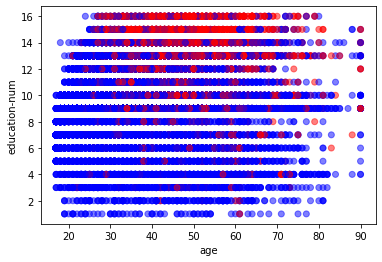

In [196]:
plt.scatter(data_raw['age'], data_raw['education-num'], color = np.array(('b', 'r'))[data_raw['label']], alpha = 0.5)
plt.xlabel('age')
plt.ylabel('education-num')

Из диаграммы видно, что более образованные люди чаще получают более 50K. Также видно, что очень молодые (примерно до 26 лет) зарабатывают менее 50к

C:\Users\Pavel\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


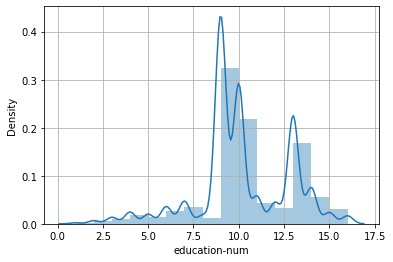

In [197]:
sns.distplot(data_raw['education-num'], bins=15)
plt.grid()

C:\Users\Pavel\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


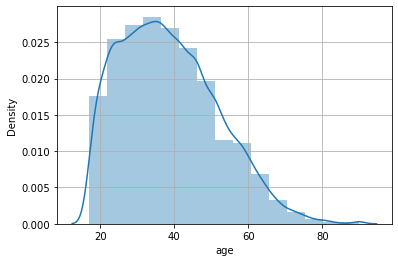

In [198]:
sns.distplot(data_raw['age'], bins=15)
plt.grid()

Большинство имеет среднее образование и выше,  а также видно, что в выборке в основном данные о людях до 60 лет

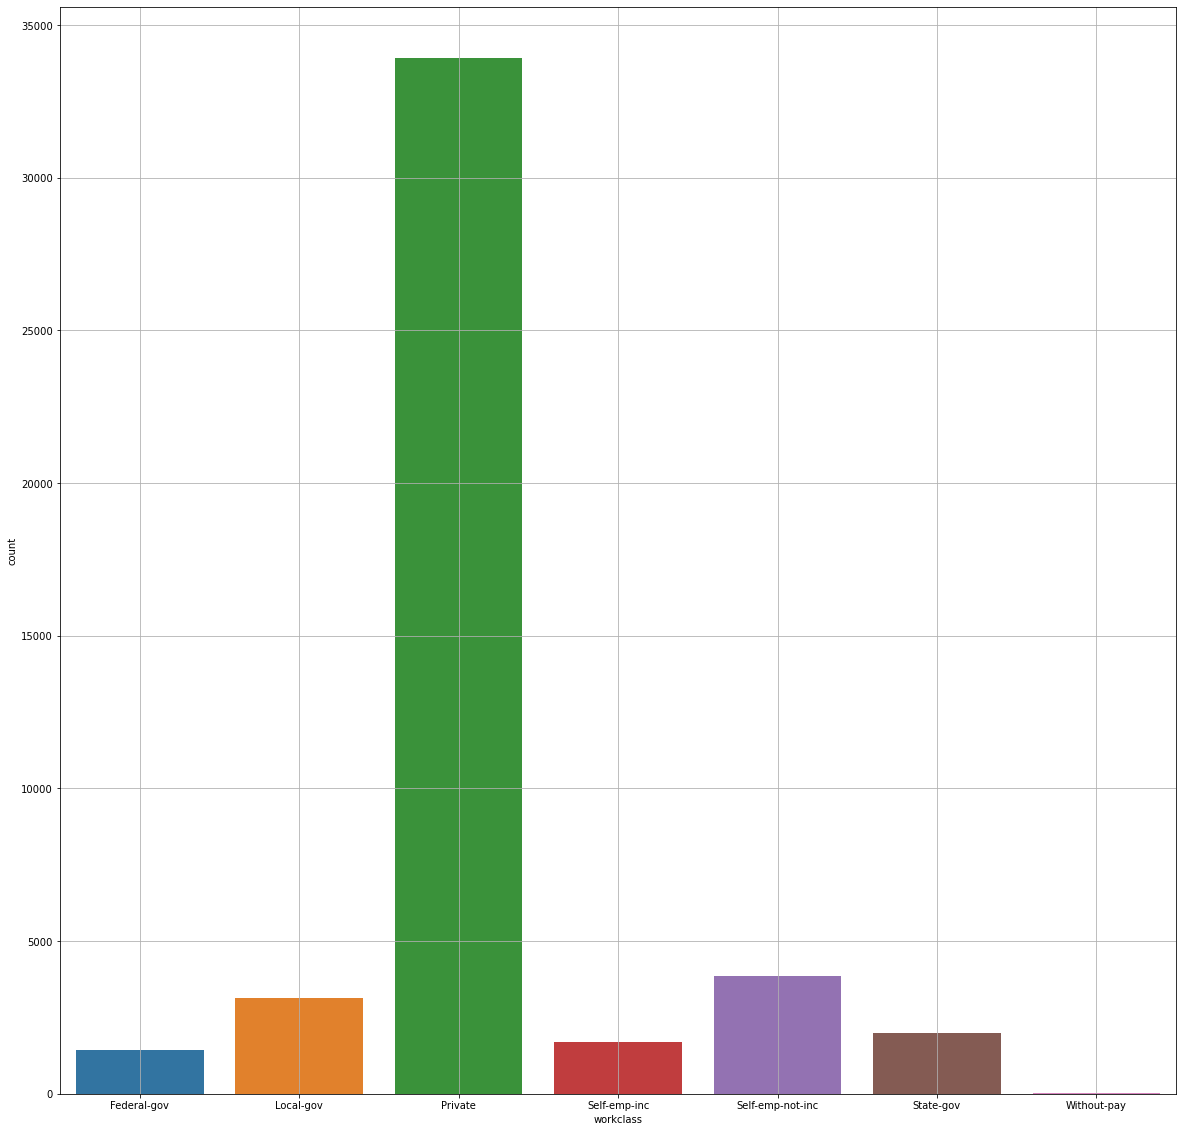

In [199]:
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(ax=ax, x="workclass", data=data_raw)
plt.grid()

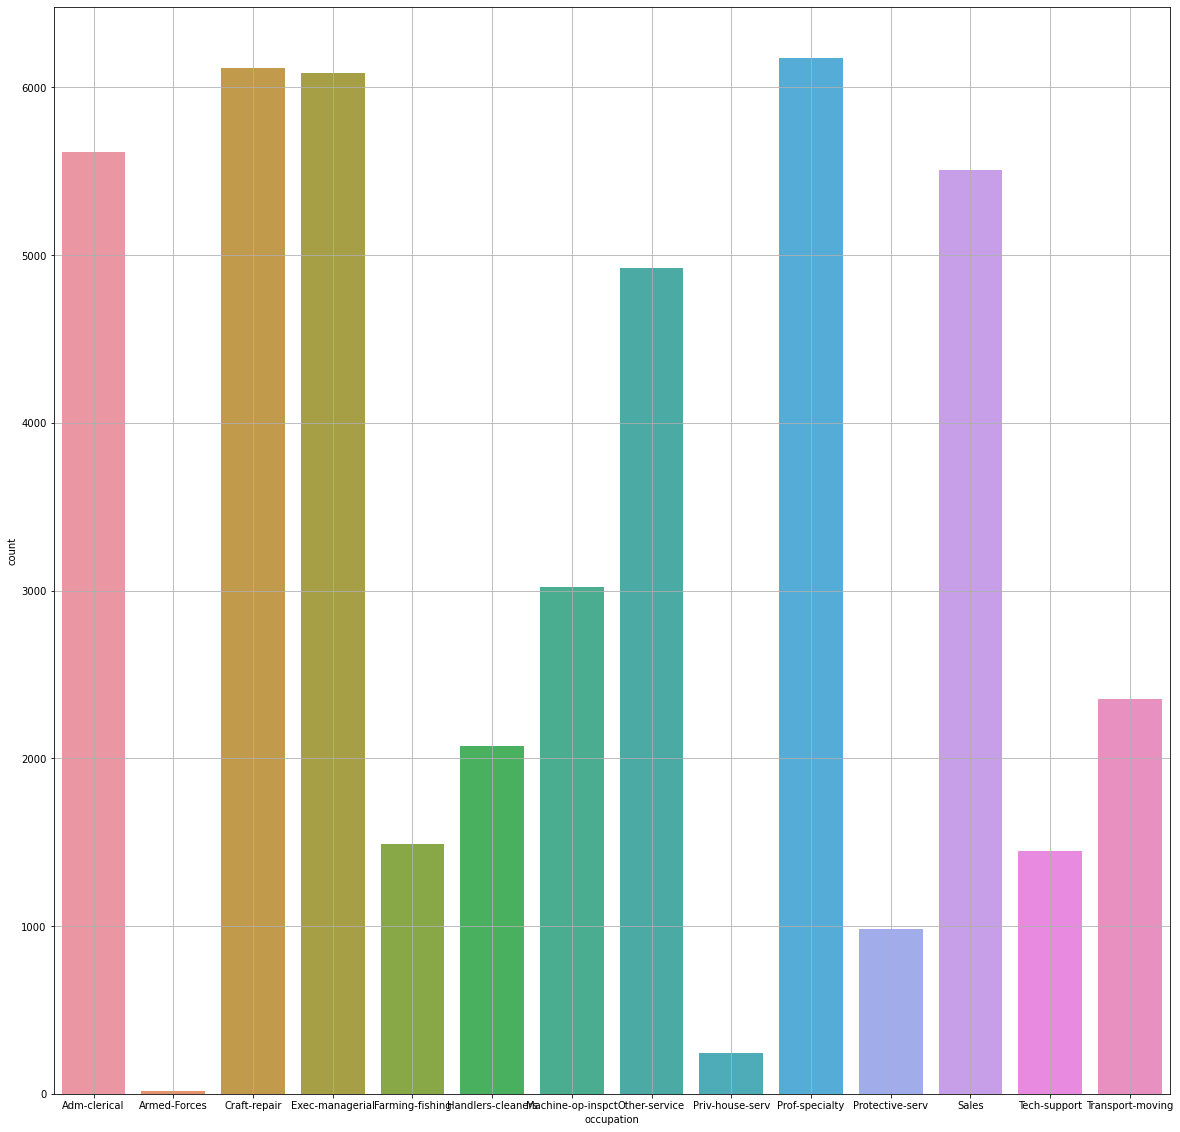

In [200]:
fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(ax=ax, x="occupation", data=data_raw)
plt.grid()

Дропнем строки, с маленьким количеством конкретных категориальных значений, конкретно это **'Without-pay'** для *workclass*;  
**'Armed-Forces'** и **'Priv-house-serv'** для *occupation*; Также уберём из выборки пожилых людей старше _84_ лет

In [201]:
print(data_raw.shape)
rows_to_drop = data_raw[
    (data_raw['age'] >= 86) |
    (data_raw['workclass'] == 'Without-pay') | (data_raw['occupation'] == 'Priv-house-serv') | 
    (data_raw['occupation'] == 'Armed-Forces')].index
data = data_raw.drop(rows_to_drop)
print(data.shape)

(46033, 12)
(45699, 12)


Избавимся от категориальных признаков с помощью **LabelEncoder**, когда каждому категориальному значению ставится в соответствие числовое

In [202]:
from sklearn.preprocessing import LabelEncoder

# workclass
le_workclass = LabelEncoder()
le_workclass.fit(data['workclass'])
data['workclass'] = le_workclass.transform(data['workclass'])
# education
le_education = LabelEncoder()
le_education.fit(data['education'])
data['education'] = le_education.transform(data['education'])
# marital-status
le_marital_status = LabelEncoder()
le_marital_status.fit(data['marital-status'])
data['marital-status'] = le_marital_status.transform(data['marital-status'])
# occupation
le_occupation = LabelEncoder()
le_occupation.fit(data['occupation'])
data['occupation'] = le_occupation.transform(data['occupation'])
# relationship
le_relationship = LabelEncoder()
le_relationship.fit(data['relationship'])
data['relationship'] = le_relationship.transform(data['relationship'])
# race
le_race = LabelEncoder()
le_race.fit(data['race'])
data['race'] = le_race.transform(data['race'])

In [203]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,label
0,39,5,9,13,4,0,1,4,0,40,0,0
1,50,4,9,13,2,2,0,4,0,13,0,0
2,38,2,11,9,0,4,1,4,0,40,0,0
3,53,2,1,7,2,4,0,2,0,40,0,0
4,28,2,9,13,2,7,5,2,1,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,9,13,4,7,3,4,0,40,0,0
48837,39,2,9,13,0,7,1,4,1,36,0,0
48839,38,2,9,13,2,7,0,4,0,50,0,0
48840,44,2,9,13,0,0,3,1,0,40,0,0


In [204]:
#print(data)
#sns.pairplot(data, hue='label', diag_kind='hist')
#plt.legend()

<AxesSubplot:>

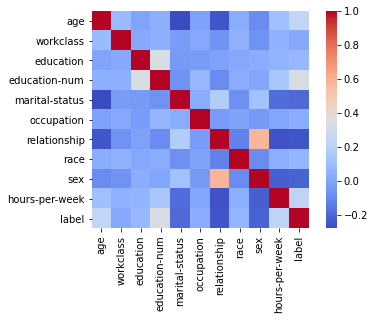

In [205]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Из матрицы корреляции видно, что _label_ лучше всего коррелирует с образованием и возрастом

In [206]:
X = data.drop(['label'], axis=1)
y = data['label']

In [207]:
print(X.shape)
print(y.shape)

(45699, 11)
(45699,)


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### KNeighborsClassifier

Лучшая точность на тестовой выборке: 0.8039387308533917
При k = : 10


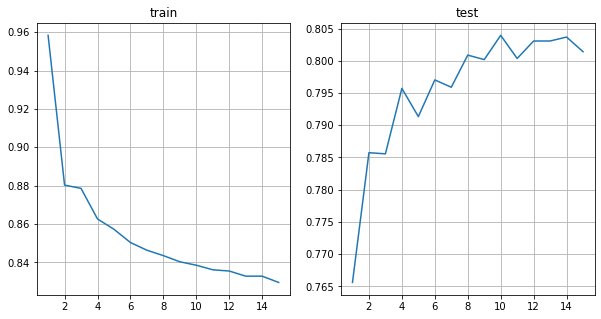

In [209]:
min_k = 1
max_k = 15
scores_train = []
scores_test = []
for k in range(min_k,max_k + 1):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, y_train)
    scores_train.append(knc.score(X_train,y_train))
    scores_test.append(knc.score(X_test,y_test))

#plt.plot(range(min_k,max_k + 1),scores_train)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

print(f"Лучшая точность на тестовой выборке: {max(scores_test)}")
print(f"При k = : {scores_test.index(max(scores_test)) + min_k}")

ax[0].set_title("train")
ax[0].plot(range(min_k,max_k + 1),scores_train)
ax[1].set_title("test")
ax[1].plot(range(min_k,max_k + 1),scores_test)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

алгоритм достиг неплохой точности на тестовой выборке в 80.3% при К=10

### RandomForestClassifier

In [210]:
rfc = RandomForestClassifier(
                 n_estimators=100,
                 criterion="gini",
                 max_depth=4,
                 min_samples_split=2,
                 min_samples_leaf=5,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 bootstrap=True,
                 oob_score=False,
                 n_jobs=None,
                 random_state=42,
                 verbose=0,
                 warm_start=False,
                 class_weight=None,
                 ccp_alpha=0.0,
                 max_samples=None)
rfc.fit(X_train,y_train)
print(f"train score = {rfc.score(X_train,y_train)}")
print(f"test  score = {rfc.score(X_test,y_test)}")

train score = 0.8149326019723405
test  score = 0.8125164113785558


алгоритм достиг неплохой точности на тестовой выборке в 81.2%